In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({
    'figure.dpi': 256,
    'figure.figsize': (7, 5),  
    'text.usetex': False,
    'font.family': 'stixgeneral',
    'mathtext.fontset': 'stix',
    'font.size': 15,
    'axes.linewidth': 1,
    # 'axes.spines.top': False,
    # 'axes.spines.right': False,
    # 'axes.spines.bottom': True,
    # 'axes.spines.left': True
})

path = "/leonardo/home/usertrain/a08tra62/JACOBI/"

data = pd.read_csv(path + "solution_640_8000.dat", delimiter = "\t", header = None, )
data.columns = ["it", "j", "i", "val"]

In [3]:
path = "/leonardo/home/usertrain/a08tra62/JACOBI/"

npdata = np.loadtxt(path + "solution_1280_1000000.dat", delimiter = "\t")
# data.columns = ["it", "j", "i", "val"]
max_it = 1000000
delta = 5000
n = int(max_it/delta) +1
dimension = 1280
dimension = dimension +2

In [5]:
np.unique(npdata[:,0]).max()

10000.0

In [4]:
data = npdata[:,3].reshape(n,dimension, dimension)

In [5]:
n//5 +1

41

MovieWriter ffmpeg unavailable; using Pillow instead.


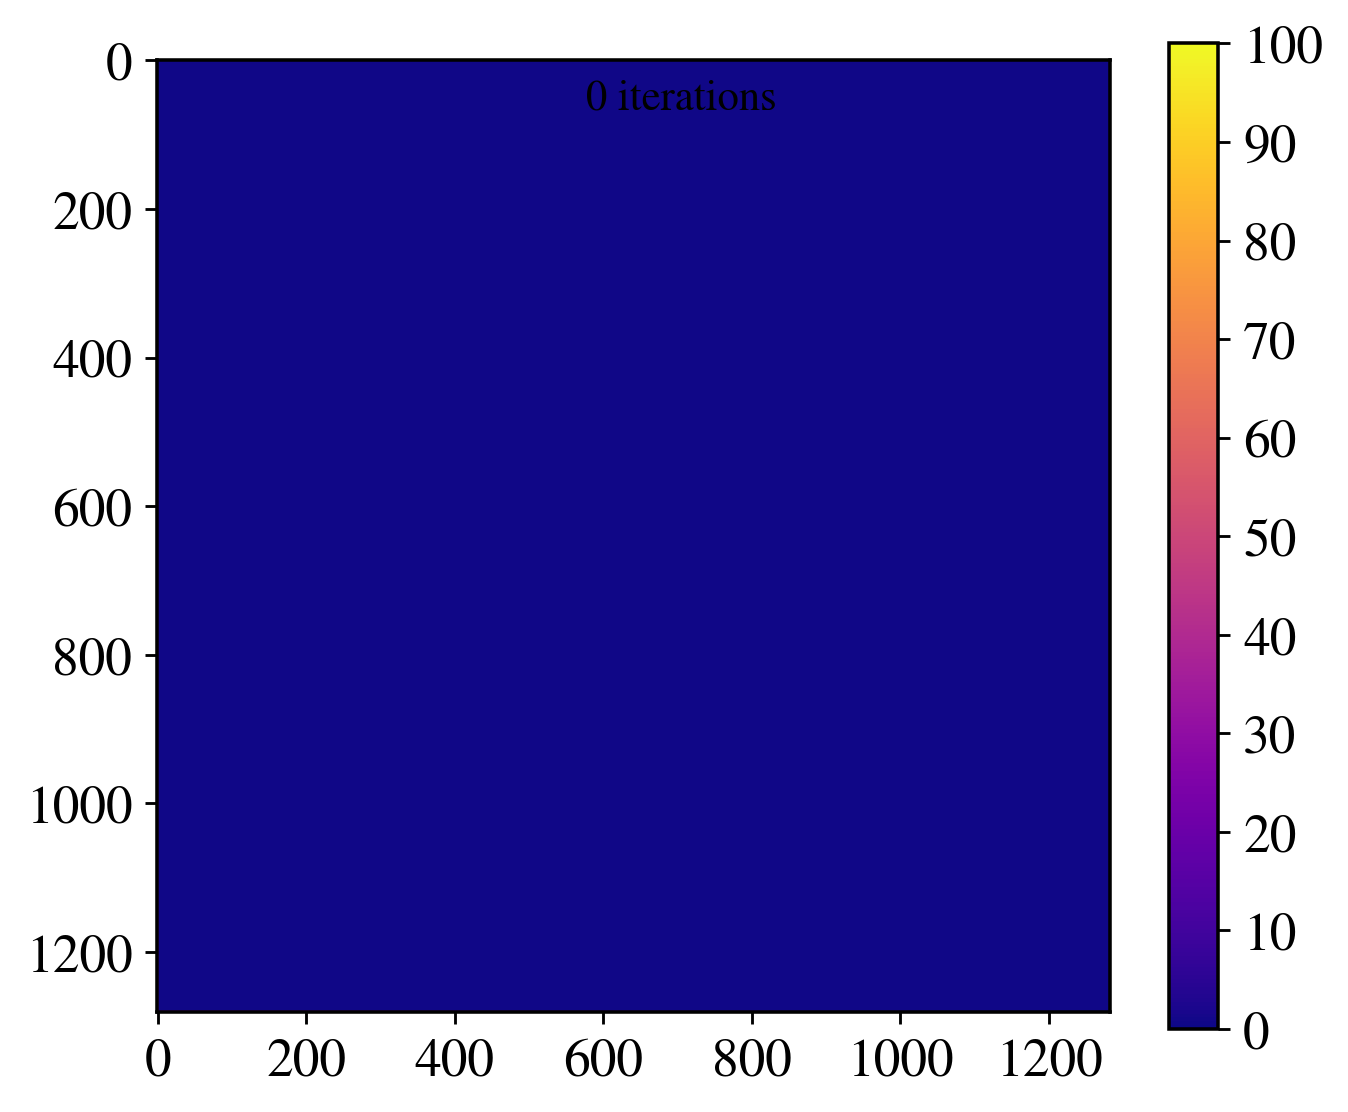

In [6]:
from matplotlib import animation

fig, ax = plt.subplots(figsize = (6, 5))
ax.invert_yaxis()
ax.set_xticks(np.arange(0,dimension,200))
ax.set_yticks(np.arange(0,dimension,200))
iteration_text = ax.annotate('', xy=(0.65, 0.98), xycoords='axes fraction', ha='right', va='top',fontsize = 12)

cont = ax.imshow(data[0], cmap = "plasma", aspect = "equal")
cbar = fig.colorbar(cont, ax=ax,ticks = np.arange(0,101,10),)

reduce = 5
# animation function
def animate(i): 
    cont = ax.imshow(data[i], cmap = "plasma", aspect = "equal")
    iteration_text.set_text(f'{i*delta*reduce} iterations')  # Update iteration value
    return cont, iteration_text 

anim = animation.FuncAnimation(fig, animate, frames= n//reduce +1, cache_frame_data = False)

anim.save('animation1280_3.gif')